In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Step 1: Environment Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 2: Data Loading & Verification
try:
    train_df = pd.read_csv('/kaggle/input/handwritten-digit-classification/mnist_train.csv')  # Verify correct path
    test_df = pd.read_csv('/kaggle/input/handwritten-digit-classification/mnist_test.csv')
except FileNotFoundError as e:
    print(f"Critical error: {e}\nEnsure files are in /kaggle/input/digit-recognizer/")
    raise

In [8]:
# Step 3: Reshaping
X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  
y_train = to_categorical(train_df.iloc[:, 0])
X_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0    

In [15]:
# Step 4: Model Architecture (Business-Grade Pattern Recognition)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 5: Model Compilation & Training
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, 
                    epochs=15, 
                    batch_size=64, 
                    validation_split=0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.8044 - loss: 0.6031 - val_accuracy: 0.9801 - val_loss: 0.0677
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9657 - loss: 0.1144 - val_accuracy: 0.9867 - val_loss: 0.0479
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9765 - loss: 0.0808 - val_accuracy: 0.9878 - val_loss: 0.0427
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9779 - loss: 0.0674 - val_accuracy: 0.9877 - val_loss: 0.0437
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9831 - loss: 0.0582 - val_accuracy: 0.9892 - val_loss: 0.0386
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9846 - loss: 0.0503 - val_accuracy: 0.9898 - val_loss: 0.0351
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9864 - loss: 0.0429 - val_accuracy: 0.9903 - val_loss: 0.0361
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9880 - loss: 0.0393 - 

In [18]:
# Step 6: Model Evaluation & Deployment Prep
test_predictions = model.predict(X_test)
predicted_labels = np.argmax(test_predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


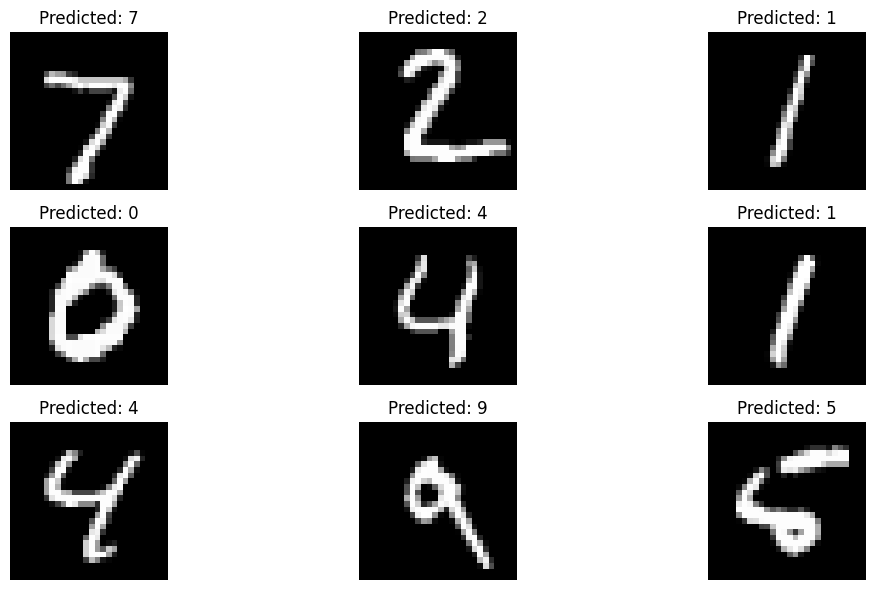

In [19]:
# Step 7: Visual Verification (Executive Summary)
plt.figure(figsize=(12,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import classification_report, accuracy_score
validation_size = 1000
X_val = X_train[:validation_size]
y_val = np.argmax(y_train[:validation_size], axis=1)
val_predictions = model.predict(X_val)
predicted_val_labels = np.argmax(val_predictions, axis=1)

# Calculate and print metrics
accuracy = accuracy_score(y_val, predicted_val_labels)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_val, predicted_val_labels))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9980
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       116
           2       0.99      1.00      0.99        99
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       105
           5       1.00      0.99      0.99        92
           6       1.00      1.00      1.00        94
           7       1.00      1.00      1.00       117
           8       0.99      1.00      0.99        87
           9       1.00      0.99      0.99       100

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

